In [32]:
import pandas as pd 
import matplotlib.pyplot as plt


# Sklearn kütüphanesi 
from sklearn.linear_model import LinearRegression # doğrusal
from sklearn.preprocessing import PolynomialFeatures # polinomsal

df = pd.read_csv("../data/data1/polinomsal_regresyon_veriseti_20220209.csv", sep=";")
df.head(5)

,araba_fiyat,araba_max_hiz
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200


In [33]:
# sklearn imput olarak genelde numpy kabul eder
y = df.araba_max_hiz.values.reshape(-1,1) # numpy array'e çevir
x = df.araba_fiyat.values.reshape(-1,1) # numpy array'e çevir


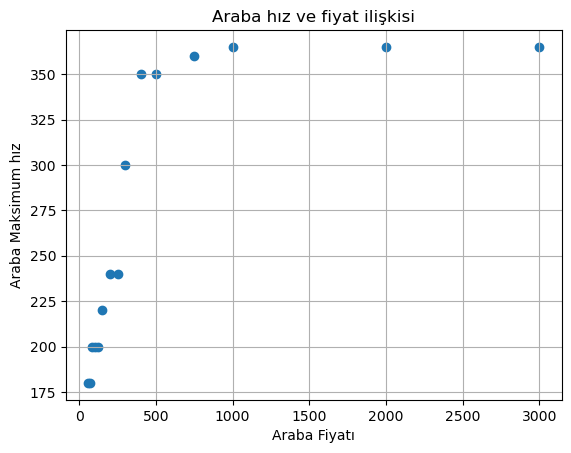

In [34]:
# veriyi görselleştirme
plt.scatter(x,y)
plt.ylabel("Araba Maksimum hız")
plt.xlabel("Araba Fiyatı")
plt.title("Araba hız ve fiyat ilişkisi")
plt.grid(True)
plt.show()

In [35]:
# Doğrusal Regresyon Modeli Eğitimi
lr = LinearRegression()
# doğrusal regresyon eğitimi
lr.fit(x,y)

LinearRegression()

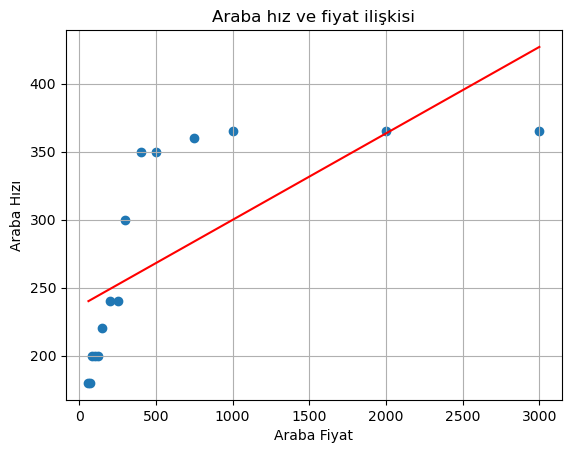

10 milyon tl lik araba hızı tahmini:  [[871.66401826]]


In [36]:
# tahmin
import numpy as np


y_tahmin = lr.predict(x)

plt.scatter(x,y)
plt.plot(x,y_tahmin, color='red')
plt.ylabel("Araba Hızı")
plt.xlabel("Araba Fiyat")
plt.title("Araba hız ve fiyat ilişkisi")
plt.grid("True")
plt.show()

araba_fiyatı = 10000
af = np.array(araba_fiyatı).reshape(-1,1)
print("10 milyon tl lik araba hızı tahmini: ", lr.predict(af))


In [37]:
# polinomsal refresyon = y = b0 + b1*x + b2*x^2 + b3*x^3 + .... + bn*x^n

# polinomsal özellikler
preg = PolynomialFeatures(degree=4) # 4. dereceden polinom

x_polinom = preg.fit_transform(x)
x_polinom
# çıktılar sırasıyla b0 + b1*x + b2*x^2 + b3*x^3 + .... + bn*x^n -> n=4 için

array([[1.0000000e+00, 6.0000000e+01, 3.6000000e+03, 2.1600000e+05,
        1.2960000e+07],
       [1.0000000e+00, 7.0000000e+01, 4.9000000e+03, 3.4300000e+05,
        2.4010000e+07],
       [1.0000000e+00, 8.0000000e+01, 6.4000000e+03, 5.1200000e+05,
        4.0960000e+07],
       [1.0000000e+00, 1.0000000e+02, 1.0000000e+04, 1.0000000e+06,
        1.0000000e+08],
       [1.0000000e+00, 1.2000000e+02, 1.4400000e+04, 1.7280000e+06,
        2.0736000e+08],
       [1.0000000e+00, 1.5000000e+02, 2.2500000e+04, 3.3750000e+06,
        5.0625000e+08],
       [1.0000000e+00, 2.0000000e+02, 4.0000000e+04, 8.0000000e+06,
        1.6000000e+09],
       [1.0000000e+00, 2.5000000e+02, 6.2500000e+04, 1.5625000e+07,
        3.9062500e+09],
       [1.0000000e+00, 3.0000000e+02, 9.0000000e+04, 2.7000000e+07,
        8.1000000e+09],
       [1.0000000e+00, 4.0000000e+02, 1.6000000e+05, 6.4000000e+07,
        2.5600000e+10],
       [1.0000000e+00, 5.0000000e+02, 2.5000000e+05, 1.2500000e+08,
        6.25

In [38]:
# polinomsal regresyon eğitebilmek için polinomsal özellikler ile karşılaştırma
lr2 = LinearRegression()
lr2.fit(x_polinom, y)

LinearRegression()

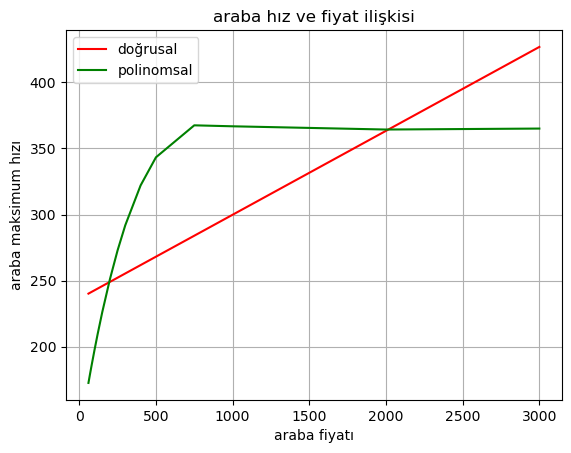

In [39]:
# tahmin

y_tahmin2 = lr2.predict(x_polinom)
plt.plot(x,y_tahmin, color='red', label='doğrusal')
plt.plot(x,y_tahmin2, color='green', label='polinomsal')
plt.legend()
plt.ylabel("araba maksimum hızı")
plt.xlabel("araba fiyatı")
plt.title("araba hız ve fiyat ilişkisi")
plt.grid(True)
plt.show()

In [46]:
from sklearn.metrics import r2_score

print("doğrusal regresyon R kare:{}",r2_score(y, y_tahmin))
print("polinomsal regresyon R kare:{}", r2_score(y, y_tahmin2))

doğrusal regresyon R kare:{} 0.4745823761330058
polinomsal regresyon R kare:{} 0.9694743023209565
